# Deep Layout Parsing

In this tutorial, we will show how to use the `layoutparser` API to 

1. Load Deep Learning Layout Detection models and predict the layout of the paper image
2. Use the coordinate system to parse the output 

The `paper-image` is from https://arxiv.org/abs/2004.08686.

In [1]:
! pip install -U layoutparser
! pip install "layoutparser[ocr]"
! pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

#install and restart 

     |████████████████████████████████| 19.2 MB 593 kB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 596 kB 54.3 MB/s 
     |████████████████████████████████| 5.6 MB 53.7 MB/s 
     |████████████████████████████████| 4.3 MB 42.2 MB/s 
     |████████████████████████████████| 139 kB 42.9 MB/s 
     |████████████████████████████████| 3.6 MB 43.7 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=99ae4e1332d6c3e6929bebb5b04c4b711e63914bcfd767cbb6b23a23a31039b9
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 435 kB 36.0 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=c19fb4e9e2b9813bef64d9041c6bde80985e5259670c2ab948cd046b15badd97
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-7augh9_j/detectron2_3be7859e10e54b539158c513e33f8bd9
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-7augh9_j/detectron2_3be7859e10e54b539158c513e33f8bd9
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 145 kB 71.1 MB/s 
     |████████████████████████████████| 130 kB 63.8 MB/s 
     |████████████████████████████████| 843 kB 51.1 MB/s 
     |████████████████████████████████| 748 kB 65.3 MB/s 
     |████████████████████████████████| 112 kB 70.4 MB/s 
  Created wheel for detectron2: filename=detectron2-0.5-cp37-cp37m-linux_x86_64.whl size=5351973 sha256=d4841c288edb8eae8e9bd19021b40c6626ae3cd6b41c2da88a07ed438ed7973c
  Stored in directory: /tmp/pip-ephem-wheel-cache

In [2]:
!apt install tesseract-ocr
!apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,355 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
import layoutparser as lp
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Use Layout Models to detect complex layout 

`layoutparser` can identify the layout of the given document with only 4 lines of code.

In [ ]:
path ="/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/"
! ls = "/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/data"

ls: cannot access '=': No such file or directory
'/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/data':
example-table.jpeg  ocred-example-table.csv  paper-image.jpg


In [ ]:
image = cv2.imread(path+"data/paper-image.jpg")
image.dtype, np.max(image)

(dtype('uint8'), 255)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 272199607_506610750894506_7887073231510229023_n.jpg to 272199607_506610750894506_7887073231510229023_n.jpg


In [ ]:
! ls

272199607_506610750894506_7887073231510229023_n.jpg  drive  sample_data


In [ ]:
#image = cv2.imread(path+"data/paper-image.jpg")
from skimage import io,transform
import numpy as np

image = cv2.imread("272199607_506610750894506_7887073231510229023_n.jpg")
image = image[..., ::-1] 
image2 = np.ones((1650, 1275, 3))
image2[100:1550, 75:1125, :] = transform.resize(image, ((1550-100, 1125-75)))
    # Convert the image from BGR (cv2 default loading style)
    # to RGB
image =(image2*255).astype(np.uint8)
image.shape #(1650, 1275, 3)

(1650, 1275, 3)

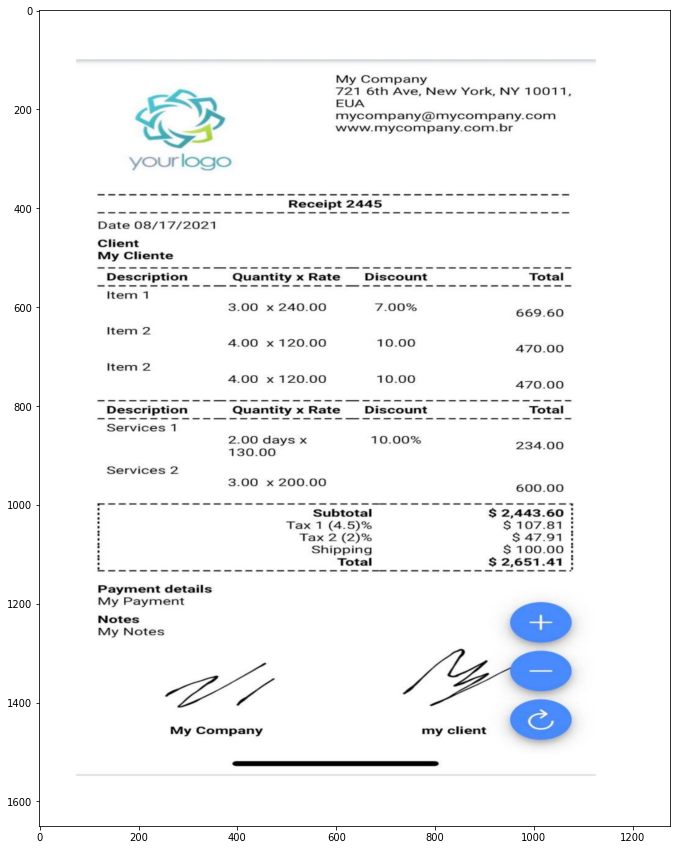

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(15,15))
plt.imshow(image)


In [ ]:
#model = lp.Detectron2LayoutModel("lp://NewspaperNavigator/faster_rcnn_R_50_FPN_3x/config", 
#                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
 #                                label_map={0: "Photograph", 1: "Illustration", 2: "Map", 3: "Comics/Cartoon", 4: "Editorial Cartoon", 5: "Headline", 6: "Advertisement"})

#model = lp.Detectron2LayoutModel("lp://TableBank/faster_rcnn_R_50_FPN_3x/config", 
 #                                extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
  #                               label_map={0: "TableBank"})


#model = lp.Detectron2LayoutModel("lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config", 
 #                                extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
 #                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

#model = lp.Detectron2LayoutModel("lp://HJDataset/faster_rcnn_R_50_FPN_3x/config", 
                   #              extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                    #             label_map={1:"Page Frame", 2:"Row", 3:"Title Region", 4:"Text Region", 5:"Title", 6:"Subtitle", 7:"Other"})



    # Load the deep layout model from the layoutparser API 
    # For all the supported model, please check the Model 
    # Zoo Page: https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html

config.yml?dl=1: 8.19kB [00:00, 14.3kB/s]
model_final.pth?dl=1: 330MB [00:04, 77.8MB/s]                          
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
layout = model.detect(image)
print("==Layout")
for b in layout:
    print(b)
    # Detect the layout of the input image

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


==Layout


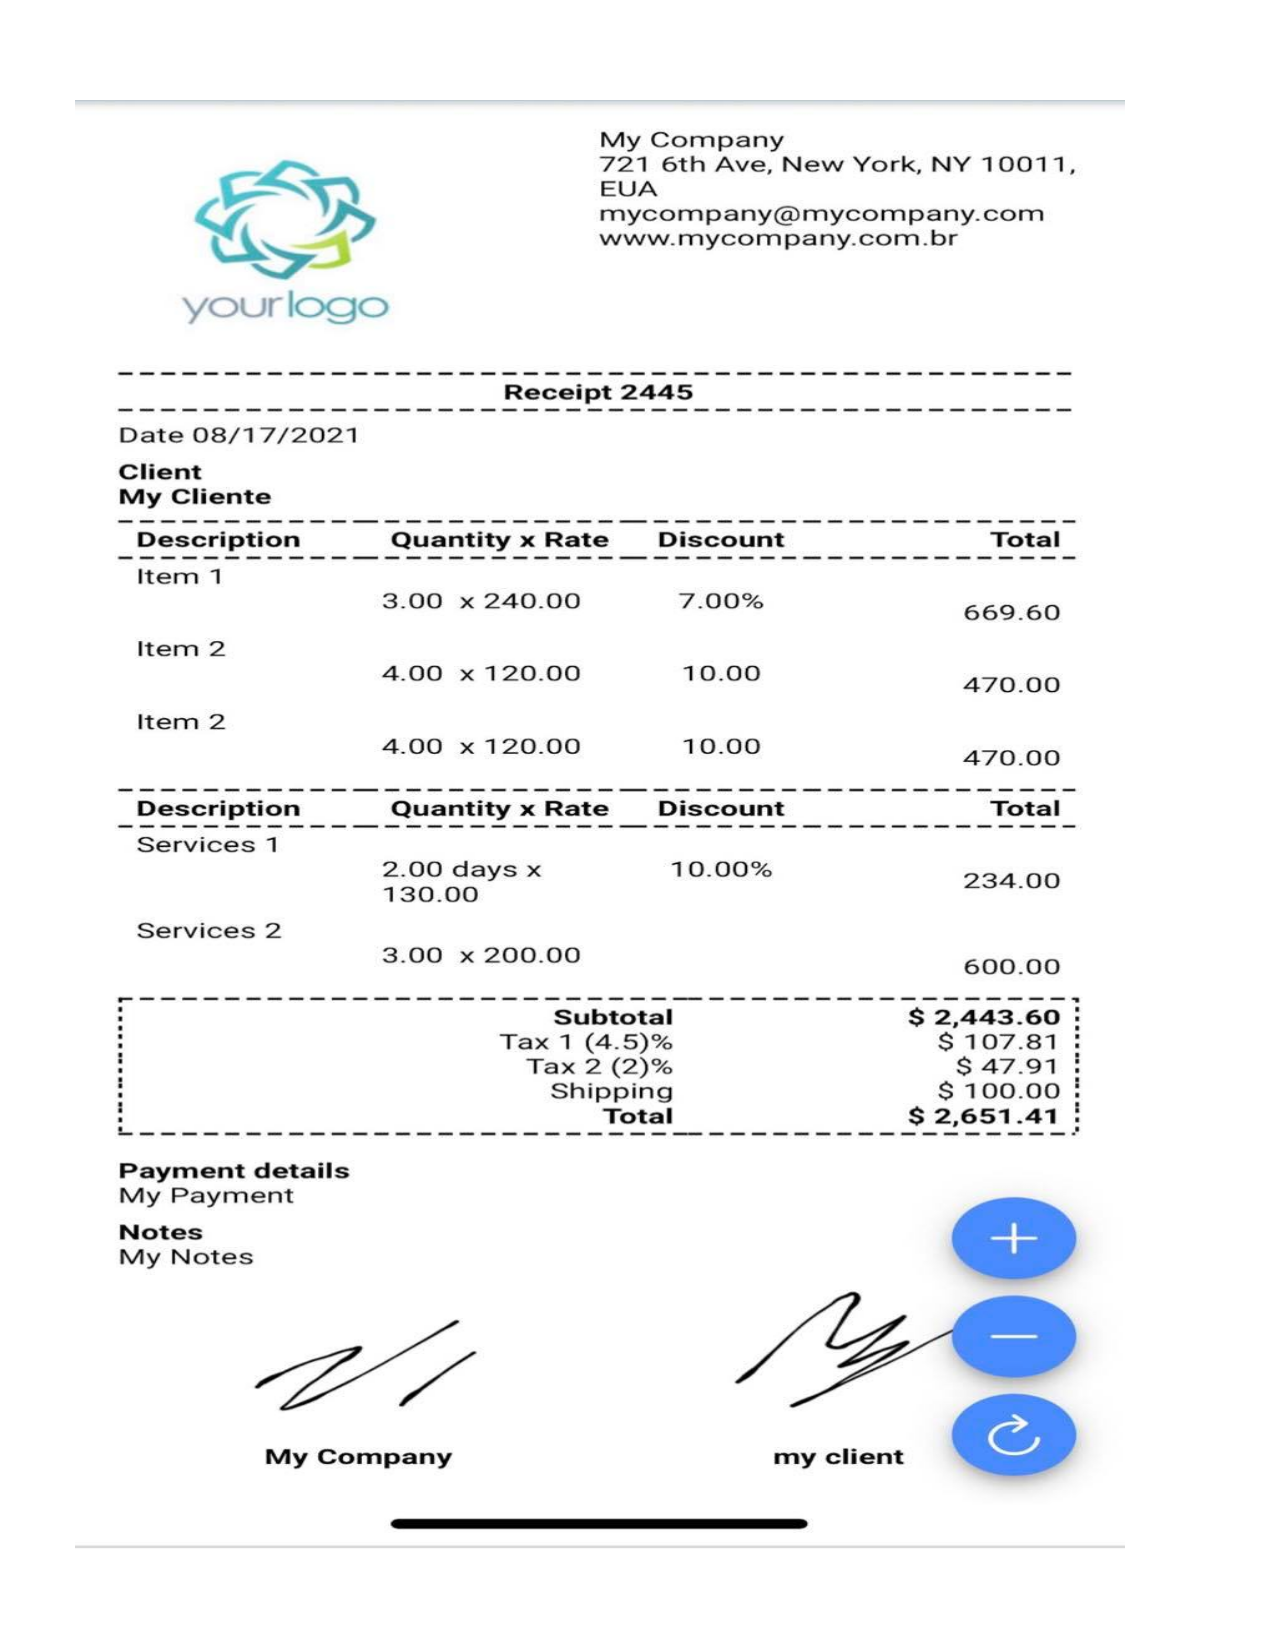

In [ ]:
lp.draw_box(image, layout, box_width=3)
    # Show the detected layout of the input image

## Check the results from the model 

In [ ]:
type(layout)         

layoutparser.elements.layout.Layout

The `layout` variable is a `Layout` instance, which is inherited from list and supports handy methods for layout processing.

In [ ]:
for b in layout:
    print(b)

TextBlock(block=Rectangle(x_1=415.7068176269531, y_1=38.83087921142578, x_2=797.8226318359375, y_2=167.9849853515625), text=None, id=None, type=Title, parent=None, next=None, score=0.96647047996521)
TextBlock(block=Rectangle(x_1=38.97114944458008, y_1=180.21090698242188, x_2=815.6227416992188, y_2=1302.6080322265625), text=None, id=None, type=Figure, parent=None, next=None, score=0.7290181517601013)
TextBlock(block=Rectangle(x_1=420.7906494140625, y_1=106.57269287109375, x_2=778.9625244140625, y_2=164.06881713867188), text=None, id=None, type=Title, parent=None, next=None, score=0.5242214202880859)
TextBlock(block=Rectangle(x_1=34.9183349609375, y_1=1251.551513671875, x_2=104.70967864990234, y_2=1278.5338134765625), text=None, id=None, type=Title, parent=None, next=None, score=0.3975892663002014)
TextBlock(block=Rectangle(x_1=32.231895446777344, y_1=1179.9632568359375, x_2=222.88414001464844, y_2=1211.37060546875), text=None, id=None, type=Title, parent=None, next=None, score=0.3620968

`layout` contains a series of `TextBlock`s. They store the coordinates in the `.block` variable and other information of the blocks like block type in `.type`, text in `.text`, etc. More information can be found at the [documentation](https://layout-parser.readthedocs.io/en/latest/api_doc/elements.html#layoutparser.elements.TextBlock). 

## Use the coordinate system to process the detected layout

Firstly we filter text regions of specific type:

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text' or b.type=='Title'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

As you will see below, the text recognized as section 5.2 will be dropped
from our layout-recognized text regions as it is parsed as a TextBlock of
type 'Title' as indicated by its different colored bounding box in the image
above.

As there could be text regions detected inside the figure region, we just drop them:

In [ ]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

Finally, sort the text regions and assign ids:

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)
# The b.coordinates[1] corresponds to the y coordinate of the region
# sort based on that can simulate the top-to-bottom reading order 
right_blocks = lp.Layout([b for b in text_blocks if b not in left_blocks])
right_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

# And finally combine the two lists and add the index
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

Visualize the cleaned text blocks:

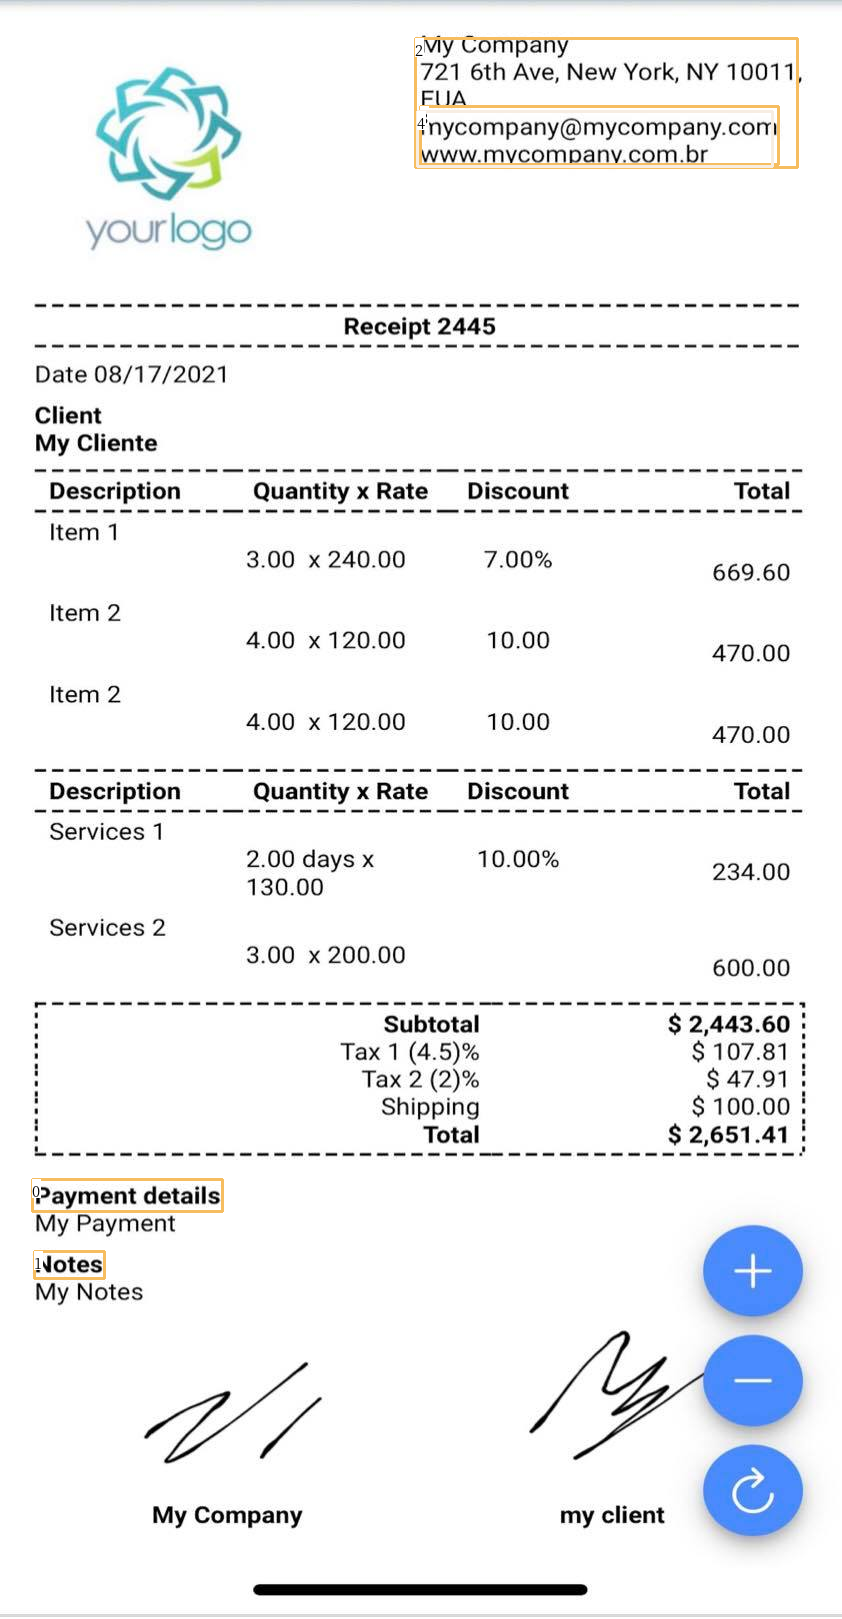

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

## Fetch the text inside each text region

We can also combine with the OCR functionality in `layoutparser` to fetch the text in the document. 

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]
#ocr_agent = lp.GCVAgent.with_credential("/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/infra-bedrock-339714-ab34f3105bbd.json", languages = ['en'])

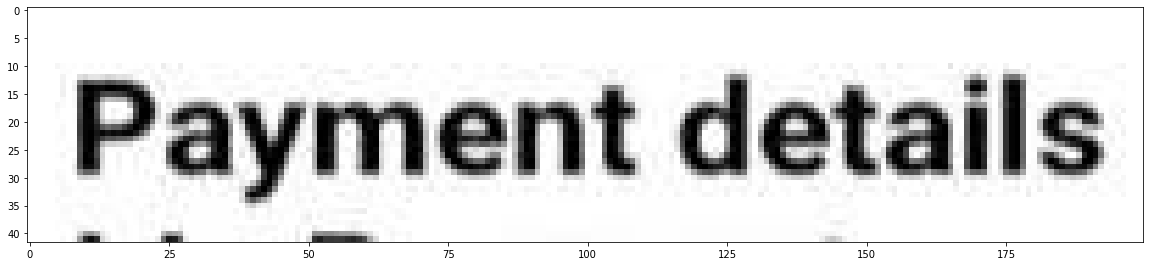

In [ ]:
segment_image = (text_blocks[0].pad(left=5, right=5, top=5, bottom=5).crop_image(image))
plt.figure(figsize=(20, 20))
plt.imshow(segment_image)

In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
    print(segment_image.shape)
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

(42, 200, 3)
(37, 80, 3)
(139, 392, 3)
(68, 368, 3)
(65, 365, 3)


In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

Payment details

---
Notes

---
My Company

721 6th Ave, New York, NY 10011,
EUA
mycompany@mycompany.com
www.mycompany.com.br

---
mycompany@mycompany.com
www.mycompany.com.br

---
mycompany@mycompany.com
www.mycompany.com.br

---
